In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=ac378a0866c3b8ae222da9e5ea985370f19fa43b103aebbeb30bdec6b91c479b
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [3]:
dir = "../input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [4]:
len(train_data)

140000

In [5]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [6]:
len(val_data)

15209

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

In [8]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [9]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [10]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [11]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [12]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [13]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [14]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [17]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [18]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.6244 - accuracy: 0.8000 - val_loss: 0.3488 - val_accuracy: 0.8694
Epoch 2/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.3500 - accuracy: 0.8818 - val_loss: 0.2642 - val_accuracy: 0.9108
Epoch 3/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.3072 - accuracy: 0.8954 - val_loss: 0.2520 - val_accuracy: 0.9164
Epoch 4/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2792 - accuracy: 0.9036 - val_loss: 0.2353 - val_accuracy: 0.9167
Epoch 5/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2614 - accuracy: 0.9090 - val_loss: 0.2399 - val_accuracy: 0.9166
Epoch 6/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2503 - accuracy: 0.9124 - val_loss: 0.2345 - val_accuracy: 0.9178
Epoch 7/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2395 - accuracy: 0.9157 - val_loss: 0.2442 - val_ac

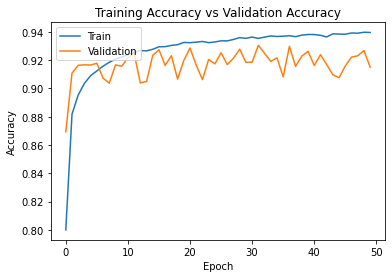

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

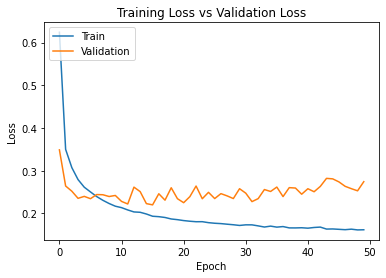

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
import numpy as np

# Assuming 'test_image_path' is the path to a single test image
test_image_path = "/kaggle/input/dataset/WhatsApp Image 2024-04-28 at 21.13.01.jpeg"

# Read the test image
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to the desired size (img_size x img_size)
img_size = 32
resized_image = cv2.resize(test_image, (img_size, img_size))

# Normalize the image data (optional, depends on the model)
normalized_image = resized_image / 255.0  # Assuming normalization is required

# Add a batch dimension to the input data
input_data = np.expand_dims(normalized_image, axis=0)

# Ensure that the input data has the correct shape
print("Input shape before reshaping:", input_data.shape)

# Reshape the input data to match the model's input requirements
input_data = np.expand_dims(input_data, axis=-1)

# Ensure that the input data has the correct shape after reshaping
print("Input shape after reshaping:", input_data.shape)

Input shape before reshaping: (1, 32, 32)
Input shape after reshaping: (1, 32, 32, 1)


In [41]:
# Pass the input data to the model for prediction
predictions = model.predict(input_data)
predictions

array([[1.0233374e-03, 2.7438340e-01, 9.9265971e-04, 1.0277168e-05,
        2.7764397e-04, 4.3249968e-04, 7.2330516e-03, 9.7374822e-04,
        1.1413431e-03, 3.5761506e-04, 3.0848123e-03, 7.4133757e-03,
        8.8056400e-03, 2.8952803e-03, 5.3885607e-03, 5.6521739e-03,
        1.9803594e-03, 3.8439215e-03, 2.9663110e-01, 5.9137256e-03,
        1.4091833e-03, 3.1677565e-01, 3.0611170e-04, 2.6524549e-03,
        4.0597985e-03, 3.4546875e-03, 2.9895378e-03, 1.5005679e-03,
        3.0023621e-03, 8.9198546e-03, 1.4577314e-02, 5.1515526e-04,
        7.9996925e-04, 9.3965540e-03, 1.2063289e-03]], dtype=float32)

In [42]:
import pytesseract

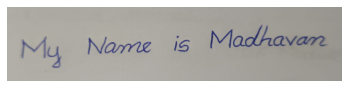

In [58]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming `test_image_path` contains the path to the uploaded test image
test_image_path = "/kaggle/input/dataset/WhatsApp Image 2024-04-28 at 21.13.01.jpeg"

# Open the image using PIL
test_image = Image.open(test_image_path)

# Display the image using Matplotlib
plt.imshow(test_image)
plt.axis('off')  # Turn off axis
plt.show()

In [45]:
# Perform OCR on the original image to extract text
extracted_text = pytesseract.image_to_string(test_image)

# Print the extracted text
print("Extracted Text:", extracted_text)

Extracted Text: M y Name is Madhavan



In [46]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [47]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [48]:
def get_word(letter):
    word = "".join(letter)
    return word

LIL0U


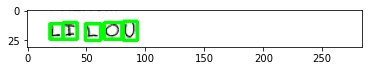

In [50]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

7AFFELX


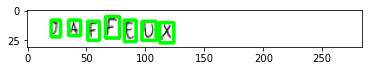

In [51]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

RUPP


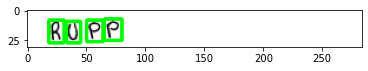

In [52]:
letter,image = get_letters("../input/handwriting-recognition/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

VALENTINE


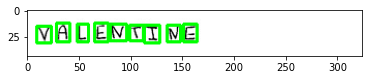

In [53]:
letter,image = get_letters("../input/handwriting-recognition/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)